<a href="https://colab.research.google.com/github/SUNNYTHAKURCODE/MACHINELEARNING/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AIM:** PRINCIPAL COMPONENT ANALYSIS(PCA)

**DATASET :** IRIS DATASET 


**THEORY:**


PCA finds the principal components of data.

It is often useful to measure data in terms of its principal components rather than on a normal x-y axis. They are the directions where there is the most variance, the directions where the data is most spread out.

PCA finds a new set of dimensions (or a set of basis of views) such that all the dimensions are orthogonal (and hence linearly independent) and ranked according to the variance of data along them. It means more important principle axis occurs first. (more important = more variance/more spread out data)

Principal components have both direction and magnitude. The direction represents across which principal axes the data is mostly spread out or has most variance and the magnitude signifies the amount of variance that Principal Component captures of the data when projected onto that axis. The principal components are a straight line, and the first principal component holds the most variance in the data. Each subsequent principal component is orthogonal to the last and has a lesser variance. In this way, given a set of x correlated variables over y samples you achieve a set of u uncorrelated principal components over the same y samples.

The reason you achieve uncorrelated principal components from the original features is that the correlated features contribute to the same principal component, thereby reducing the original data features into uncorrelated principal components; each representing a different set of correlated features with different amounts of variation.

In [68]:
#link google drive to google colab 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
# change the working directory of your code on google drive
%cd/content/drive/My Drive/Colab Notebooks/Python Practice

/content/drive/My Drive/Colab Notebooks/Python Practice


In [0]:
#Importing Packages
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from IPython import display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline 

In [0]:
#Reading the dataset
dataset = pd.read_csv(r'Iris.csv',index_col='Id')

In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [73]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [115]:
dataset[0:5]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [0]:
## Label encoding since the algorithms we are going to use do not take non numerical or boolean data as inputs
dataset.Species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

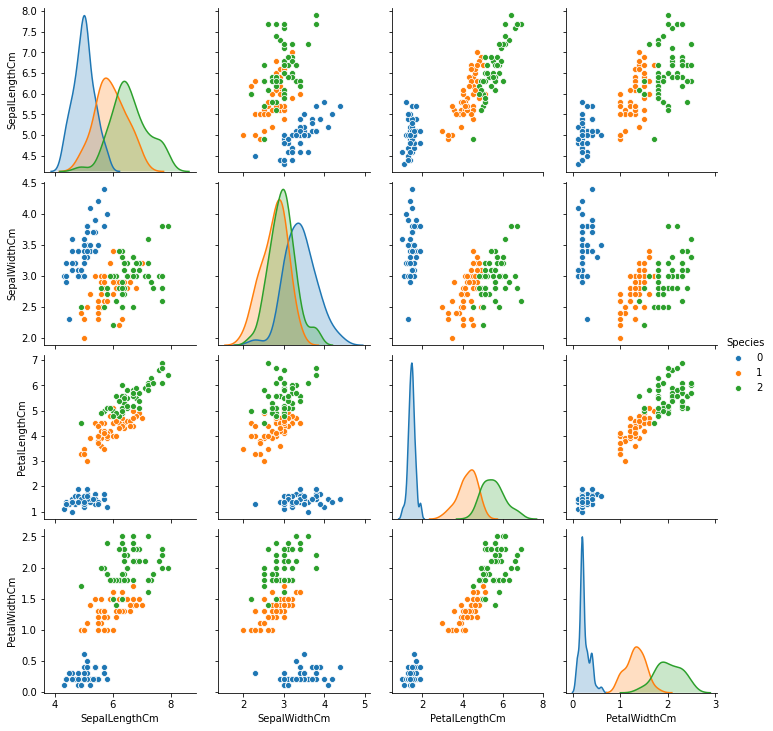

In [77]:
#visualizing the dataset feautres 
p=sns.pairplot(dataset, hue = 'Species')

([], <a list of 0 Text major ticklabel objects>)

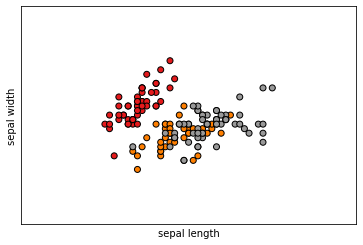

In [78]:
# plotting the samples data 

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())


Correlation Matrix

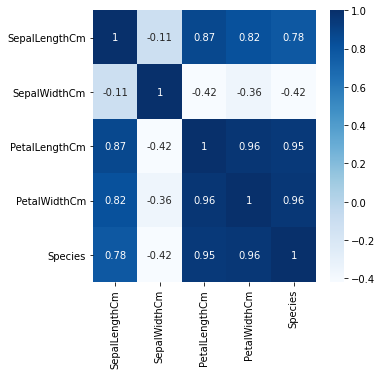

In [80]:
plt.figure(figsize=(5,5))
p=sns.heatmap(dataset.corr(), annot=True,cmap='Blues') 

Covariance Matrix

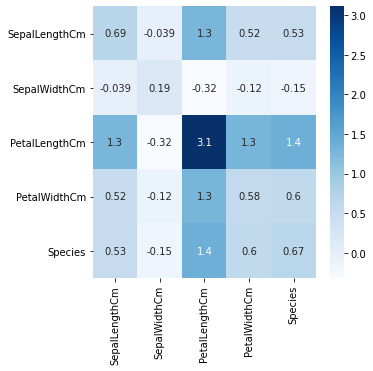

In [81]:
plt.figure(figsize=(5,5))
p=sns.heatmap(dataset.cov(), annot=True,cmap='Blues') 

In [0]:
X =dataset.drop(['Species'],axis=1)
y = dataset.Species

In [0]:
pca_iris = PCA(n_components=2)
principalComponents_iris = pca_iris.fit_transform(dataset)

In [127]:
principal_iris_Df = pd.DataFrame(data = principalComponents_iris
             , columns = ['principal component 1', 'principal component 2'])
principal_iris_Df.head()

,principal component 1,principal component 2
0,-2.865507,0.302780
1,-2.893213,-0.176987
2,-3.055749,-0.168006
3,-2.921249,-0.325027
4,-2.906751,0.302333


In [128]:
print('Explained variation per principal component: {}'.format(pca_iris.explained_variance_ratio_))

Explained variation per principal component: [0.92264045 0.04810411]


<Figure size 432x288 with 0 Axes>

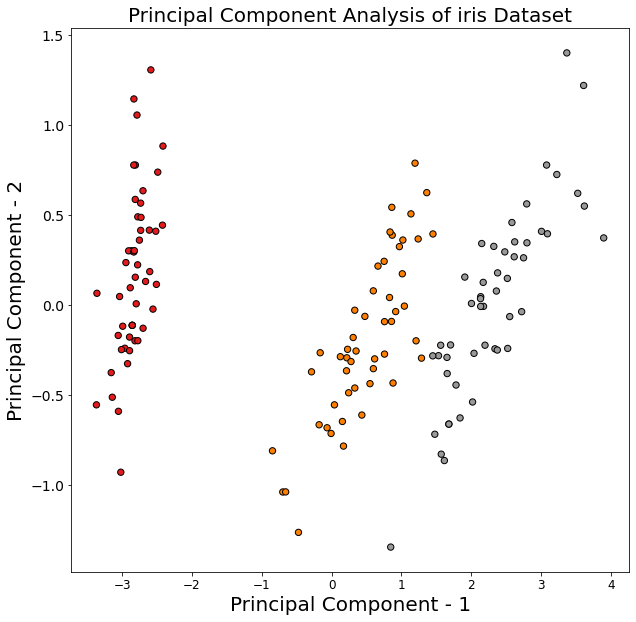

In [146]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of iris Dataset",fontsize=20)
colors = ['r', 'g', 'b' ]
X_reduced = PCA(n_components=2).fit_transform(dataset)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)


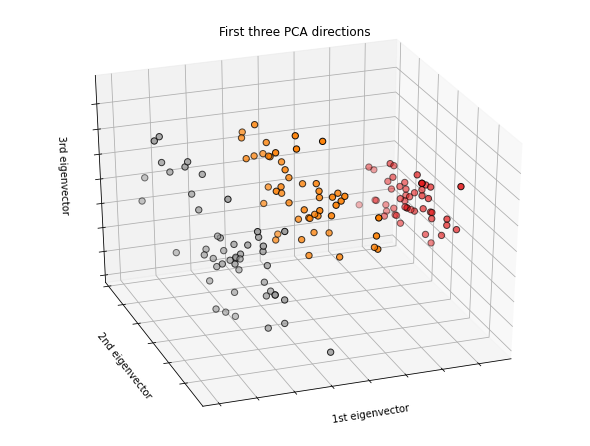

In [79]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

# we find the three reduced principal components(feautres) and plot it 
X_reduced = PCA(n_components=3).fit_transform(dataset)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()